<a href="https://colab.research.google.com/github/roshank1605A04/Stock-Market-Predictions/blob/master/Stock_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Stock Prediction
## Aril Dhayal

In [25]:
from google.colab import files 
uploaded = files.upload()

Saving Google_Stock_Price_Train.csv to Google_Stock_Price_Train (3).csv


In [26]:
from google.colab import files 
uploaded = files.upload()

Saving Google_Stock_Price_Test.csv to Google_Stock_Price_Test (4).csv


In [27]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns


In [28]:
training_data = pd.read_csv('Google_Stock_Price_Train.csv')

training_data.shape
training_data.head()

,Date,Open,High,Low,Close,Volume
0,1/3/2012,325.25,332.83,324.97,663.59,"7,380,500"
1,1/4/2012,331.27,333.87,329.08,666.45,"5,749,400"
2,1/5/2012,329.83,330.75,326.89,657.21,"6,590,300"
3,1/6/2012,328.34,328.77,323.68,648.24,"5,405,900"
4,1/9/2012,322.04,322.29,309.46,620.76,"11,688,800"


In [29]:
training_data = training_data.iloc[:, 1:2]

training_data.shape
training_data.head()

,Open
0,325.25
1,331.27
2,329.83
3,328.34
4,322.04


In [30]:
# feature scaling

from sklearn.preprocessing import MinMaxScaler

mm = MinMaxScaler(feature_range = (0, 1))
training_data = mm.fit_transform(training_data)


In [31]:
# Getting the inputs and outputs

x_train = training_data[0:1257]
y_train = training_data[1:1258]

print(x_train.shape)
print(y_train.shape)


(1257, 1)
(1257, 1)


In [32]:
# reshaping

x_train = np.reshape(x_train, (1257, 1, 1))

print(x_train.shape)

(1257, 1, 1)


In [33]:
# importing the keras libraries and packages

import keras
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM


In [34]:
# initializing the model
model = Sequential()

# adding the input layer and the LSTM layer
model.add(LSTM(units = 4, activation = 'sigmoid', input_shape = (None, 1)))

# adding the output layer
model.add(Dense(units = 1))

# compiling the model
model.compile(optimizer = 'adam', loss = 'mean_squared_error')

# fitting the RNN to the training data
model.fit(x_train, y_train, batch_size = 32, epochs = 200)


Epoch 1/200
40/40 [==============================] - 2s 2ms/step - loss: 0.3866
Epoch 2/200
40/40 [==============================] - 0s 2ms/step - loss: 0.2458
Epoch 3/200
40/40 [==============================] - 0s 2ms/step - loss: 0.1837
Epoch 4/200
40/40 [==============================] - 0s 2ms/step - loss: 0.1336
Epoch 5/200
40/40 [==============================] - 0s 2ms/step - loss: 0.1050
Epoch 6/200
40/40 [==============================] - 0s 2ms/step - loss: 0.0904
Epoch 7/200
40/40 [==============================] - 0s 2ms/step - loss: 0.0793
Epoch 8/200
40/40 [==============================] - 0s 2ms/step - loss: 0.0743
Epoch 9/200
40/40 [==============================] - 0s 2ms/step - loss: 0.0700
Epoch 10/200
40/40 [==============================] - 0s 2ms/step - loss: 0.0669
Epoch 11/200
40/40 [==============================] - 0s 2ms/step - loss: 0.0665
Epoch 12/200
40/40 [==============================] - 0s 2ms/step - loss: 0.0664
Epoch 13/200
40/40 [=================

In [35]:
# getting the real stock of 2017 i.e., importing the test dataset

test_data = pd.read_csv('Google_Stock_Price_Test.csv')
real_stock_price = test_data.iloc[:,1:2]
real_stock_price.head()


,Open
0,778.81
1,788.36
2,786.08
3,795.26
4,806.40


In [36]:
# getting the predicted stock price of 2017

inputs = real_stock_price
inputs = mm.transform(inputs)
inputs = np.reshape(inputs, (20, 1, 1))


predicted_stock_price = model.predict(inputs)
predicted_stock_price = mm.inverse_transform(predicted_stock_price)


In [37]:
predicted_stock_price

array([[773.79846],
       [782.20874],
       [780.209  ],
       [788.2293 ],
       [797.849  ],
       [799.1004 ],
       [796.6469 ],
       [798.48346],
       [798.77484],
       [798.4321 ],
       [797.3425 ],
       [796.75006],
       [798.28625],
       [798.5778 ],
       [811.3594 ],
       [817.4912 ],
       [824.28503],
       [821.7219 ],
       [804.90015],
       [789.6186 ]], dtype=float32)

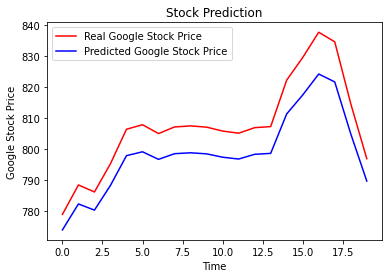

In [38]:
# visualizing the results

plt.plot(real_stock_price, color = 'red', label = 'Real Google Stock Price')
plt.plot(predicted_stock_price, color = 'blue', label = 'Predicted Google Stock Price')
plt.title('Stock Prediction')
plt.xlabel('Time')
plt.ylabel('Google Stock Price')
plt.legend()
plt.show()

In [39]:
# getting the real stock price of 2012 - 2016

training_data = pd.read_csv('Google_Stock_Price_Train.csv')

training_data.shape
training_data.head()

,Date,Open,High,Low,Close,Volume
0,1/3/2012,325.25,332.83,324.97,663.59,"7,380,500"
1,1/4/2012,331.27,333.87,329.08,666.45,"5,749,400"
2,1/5/2012,329.83,330.75,326.89,657.21,"6,590,300"
3,1/6/2012,328.34,328.77,323.68,648.24,"5,405,900"
4,1/9/2012,322.04,322.29,309.46,620.76,"11,688,800"


In [40]:
training_data = training_data.iloc[:, 1:2]

training_data.shape
training_data.head()

,Open
0,325.25
1,331.27
2,329.83
3,328.34
4,322.04


In [41]:
# getting the predicted stock price of 2012-2016

predicted_stock_price = model.predict(x_train)
predicted_stock_price = mm.inverse_transform(predicted_stock_price)

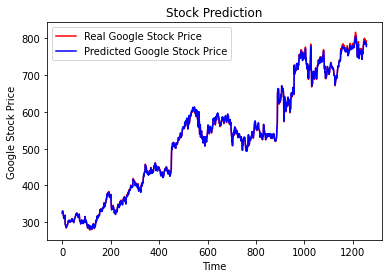

In [42]:
# visualizing the whole training data results

plt.plot(training_data, color = 'red', label = 'Real Google Stock Price')
plt.plot(predicted_stock_price, color = 'blue', label = 'Predicted Google Stock Price')
plt.title('Stock Prediction')
plt.xlabel('Time')
plt.ylabel('Google Stock Price')
plt.legend()
plt.show()